Hello and a warm welcome to the very first EDA file that I proudly present! In this exciting journey, we will delve into the timeless and classic dataset, the `Housing Prices Competition`. This extraordinary dataset has stood the test of time and holds a treasure trove of insights waiting to be discovered.

Throughout this exploration, we will embark on a mission to predict the elusive `SalePrice` of captivating houses, unlocking the potential of various remarkable features. Our ultimate aspiration is to craft a powerful and accurate model capable of foreseeing the price with sheer brilliance and precision.

# Importing some important stuffs

In [15]:
# numpy and pandas for data manipulation
import numpy as np
import pandas as pd 

# sklearn preprocessing for dealing with categorical variables
from sklearn.preprocessing import LabelEncoder

# File system manangement
import os

# Suppress warnings 
import warnings
warnings.filterwarnings('ignore')

# matplotlib and seaborn for plotting
import matplotlib.pyplot as plt
import seaborn as sns

# Read the data and see it

In [16]:
train = pd.read_csv("Datasets/train.csv")
test = pd.read_csv("Datasets/test.csv")

In [17]:
# train = train.drop("Id", axis=1)
# test = test.drop("Id", axis=1)

In [18]:
train.shape, test.shape

((1460, 81), (1459, 80))

In [19]:
train.head()

,Id,MSSubClass,MSZoning,LotFrontage,LotArea,Street,Alley,LotShape,LandContour,Utilities,...,PoolArea,PoolQC,Fence,MiscFeature,MiscVal,MoSold,YrSold,SaleType,SaleCondition,SalePrice
0,1,60,RL,65.0,8450,Pave,NaN,Reg,Lvl,AllPub,...,0,NaN,NaN,NaN,0,2,2008,WD,Normal,208500
1,2,20,RL,80.0,9600,Pave,NaN,Reg,Lvl,AllPub,...,0,NaN,NaN,NaN,0,5,2007,WD,Normal,181500
2,3,60,RL,68.0,11250,Pave,NaN,IR1,Lvl,AllPub,...,0,NaN,NaN,NaN,0,9,2008,WD,Normal,223500
3,4,70,RL,60.0,9550,Pave,NaN,IR1,Lvl,AllPub,...,0,NaN,NaN,NaN,0,2,2006,WD,Abnorml,140000
4,5,60,RL,84.0,14260,Pave,NaN,IR1,Lvl,AllPub,...,0,NaN,NaN,NaN,0,12,2008,WD,Normal,250000


In [20]:
test.head()

,Id,MSSubClass,MSZoning,LotFrontage,LotArea,Street,Alley,LotShape,LandContour,Utilities,...,ScreenPorch,PoolArea,PoolQC,Fence,MiscFeature,MiscVal,MoSold,YrSold,SaleType,SaleCondition
0,1461,20,RH,80.0,11622,Pave,NaN,Reg,Lvl,AllPub,...,120,0,NaN,MnPrv,NaN,0,6,2010,WD,Normal
1,1462,20,RL,81.0,14267,Pave,NaN,IR1,Lvl,AllPub,...,0,0,NaN,NaN,Gar2,12500,6,2010,WD,Normal
2,1463,60,RL,74.0,13830,Pave,NaN,IR1,Lvl,AllPub,...,0,0,NaN,MnPrv,NaN,0,3,2010,WD,Normal
3,1464,60,RL,78.0,9978,Pave,NaN,IR1,Lvl,AllPub,...,0,0,NaN,NaN,NaN,0,6,2010,WD,Normal
4,1465,120,RL,43.0,5005,Pave,NaN,IR1,HLS,AllPub,...,144,0,NaN,NaN,NaN,0,1,2010,WD,Normal


# Plotting the distribution of target column (this is very important first step)

<AxesSubplot:title={'center':'Sale Price Distribution in Train Dataset'}>

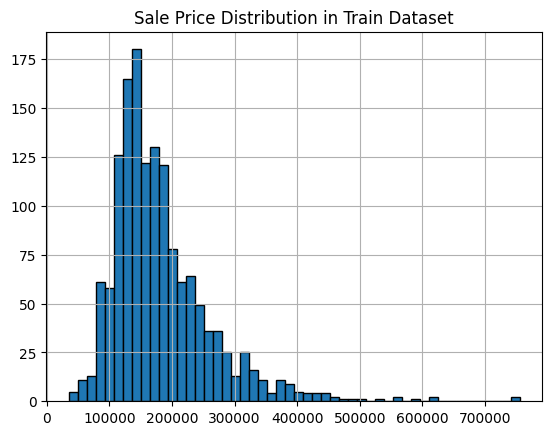

In [21]:
plt.title("Sale Price Distribution in Train Dataset")
train["SalePrice"].hist(edgecolor='black', bins=50)

# Looking at the missing values of each column

In [22]:
# Function to calculate missing values by column# Funct 
def missing_values_table(df):
        # Total missing values
        mis_val = df.isnull().sum()
        
        # Percentage of missing values
        mis_val_percent = 100 * df.isnull().sum() / len(df)
        
        # Make a table with the results
        mis_val_table = pd.concat([mis_val, mis_val_percent], axis=1)
        
        # Rename the columns
        mis_val_table_ren_columns = mis_val_table.rename(
        columns = {0 : 'Missing Values', 1 : '% of Total Values'})
        
        # Sort the table by percentage of missing descending
        mis_val_table_ren_columns = mis_val_table_ren_columns[
            mis_val_table_ren_columns.iloc[:,1] != 0].sort_values(
        '% of Total Values', ascending=False).round(1)
        
        # Print some summary information
        print ("Your selected dataframe has " + str(df.shape[1]) + " columns.\n"      
            "There are " + str(mis_val_table_ren_columns.shape[0]) +
              " columns that have missing values.")
        
        # Return the dataframe with missing information
        return mis_val_table_ren_columns

In [23]:
missing_values_table(train)

Your selected dataframe has 81 columns.
There are 19 columns that have missing values.


,Missing Values,% of Total Values
PoolQC,1453,99.5
MiscFeature,1406,96.3
Alley,1369,93.8
Fence,1179,80.8
FireplaceQu,690,47.3
LotFrontage,259,17.7
GarageType,81,5.5
GarageYrBlt,81,5.5
GarageFinish,81,5.5
GarageQual,81,5.5


In [24]:
missing_values_table(test)

Your selected dataframe has 80 columns.
There are 33 columns that have missing values.


,Missing Values,% of Total Values
PoolQC,1456,99.8
MiscFeature,1408,96.5
Alley,1352,92.7
Fence,1169,80.1
FireplaceQu,730,50.0
LotFrontage,227,15.6
GarageCond,78,5.3
GarageYrBlt,78,5.3
GarageQual,78,5.3
GarageFinish,78,5.3


It's worth noting that the `test` dataset exhibits a slightly `higher number of NaN` values compared to the `training dataset`. While we observe several columns with just 1 or 2 missing values, it's imperative to approach this challenge with a positive and intelligent mindset. Let's get going to look out for the datatypes that we are dealing with.

In [25]:
train.dtypes.value_counts()

object     43
int64      35
float64     3
dtype: int64

In [26]:
test.dtypes.value_counts()

object     43
int64      26
float64    11
dtype: int64

Good. Now we're ready to handle the data.

# Handling data

In our exploration, a fascinating observation comes to light - when the `Alley` column contains a `nan value`, it signifies the `absence of alley access` (as stated in the data_description.txt on Datasets/data_description.txt). This intriguing insight opens the door for a simple yet powerful solution: we can seamlessly `replace these missing values` with the phrase `No Alley`, enriching our dataset with valuable context and paving the way for more accurate and comprehensive analyses.

In [27]:
train["Alley"] = train["Alley"].fillna("No Alley")
test["Alley"] = test["Alley"].fillna("No Alley")

As we shift our focus to the `Utilities` column, a noteworthy discovery awaits - this column predominantly comprises a single unique value throughout the dataset, and remarkably, it contains `no missing values`. Given the `minimal variance` in this feature, a prudent decision emerges: we can confidently `drop this column`, streamlining our dataset while preserving its integrity and enhancing the efficiency of our analysis. By doing so, we sharpen our data's precision and set the stage for more meaningful insights and informed decision-making processes.

In [28]:
train["Utilities"].value_counts()

AllPub    1459
NoSeWa       1
Name: Utilities, dtype: int64

In [29]:
train["Utilities"].isna().sum()

0

In [30]:
train = train.drop("Utilities", axis=1)
test = test.drop("Utilities", axis=1)

Great! With our remarkable progress in handling the previous columns, it's time to turn our attention to an exciting new task. Let's confidently identify categorical columns consisting of just `2 unique values` and embark on a transformative journey of `encoding` them using the ingenious `label encoder`. This savvy choice aligns perfectly with the nature of these columns, as they present precisely 2 unique values. By applying the label encoder, we are poised to unlock the full potential of these categorical features, enriching our dataset with valuable encoded representations, and propelling our analysis to new heights of accuracy and comprehension.

In [31]:
value = train.select_dtypes('object').apply(pd.Series.nunique, axis = 0)
value[value==2]

Street        2
CentralAir    2
dtype: int64

In [32]:
# Create a label encoder object
le = LabelEncoder()
le_count = 0

# Iterate through the columns
for col in train:
    if train[col].dtype == 'object':
        # If 2 or fewer unique categories
        if len(list(train[col].unique())) <= 2:
            # Train on the training data
            le.fit(train[col])
            # Transform both training and testing data
            train[col] = le.transform(train[col])
            test[col] = le.transform(test[col])
            
            # Keep track of how many columns were label encoded
            print(col)
            le_count += 1
            
print('%d columns were label encoded.' % le_count)

Street
CentralAir
2 columns were label encoded.


Having successfully employed the `label encoder` to handle categorical columns with `2 unique values`, we now eagerly set our sights on `the remaining categorical features`, poised to unleash the power of `one hot encoding`. By implementing this ingenious technique, we shall transform these diverse categorical columns into a rich and comprehensive set of binary indicators, capturing the essence of each category with utmost precision.

In [33]:
# one-hot encoding of categorical variables
train = pd.get_dummies(train)
test = pd.get_dummies(test)

print('Training Features shape: ', train.shape)
print('Testing Features shape: ', test.shape)

Training Features shape:  (1460, 287)
Testing Features shape:  (1459, 269)


As we embark on the next phase of our data refinement journey, we shall address the columns that boast only 1 or 2 rows with missing values in a clever and resourceful manner. Our ingenious approach involves `filling these limited nan entries` with the respective column's `mean` value. By employing this intelligent strategy, we ensure that these minor gaps are seamlessly bridged.

In [34]:
for col in missing_values_table(test).index[3:]:
    test[col] = test[col].fillna(test[col].mean())

Your selected dataframe has 269 columns.
There are 11 columns that have missing values.


In [35]:
missing_values_table(train)

Your selected dataframe has 287 columns.
There are 3 columns that have missing values.


,Missing Values,% of Total Values
LotFrontage,259,17.7
GarageYrBlt,81,5.5
MasVnrArea,8,0.5


In [36]:
missing_values_table(test)

Your selected dataframe has 269 columns.
There are 3 columns that have missing values.


,Missing Values,% of Total Values
LotFrontage,227,15.6
GarageYrBlt,78,5.3
MasVnrArea,15,1.0


In [37]:
imputed_cols = missing_values_table(train).index

Your selected dataframe has 287 columns.
There are 3 columns that have missing values.


In [38]:
for col in imputed_cols:
    train[col] = train[col].fillna(train[col].mean())
    test[col] = test[col].fillna(test[col].mean())

In [39]:
train.shape

(1460, 287)

In [40]:
test.shape

(1459, 269)

# Finally, allign it!

In [41]:
train_labels = train['SalePrice']

# Align the training and testing data, keep only columns present in both dataframes
train, test = train.align(test, join = 'inner', axis = 1)

# Add the SalePrice back in
train['SalePrice'] = train_labels

print('Training Features shape: ', train.shape)
print('Testing Features shape: ', test.shape)

Training Features shape:  (1460, 270)
Testing Features shape:  (1459, 269)


In [42]:
# train.to_csv("Datasets/train_le_ohe.csv", index=False)
# test.to_csv("Datasets/test_le_ohe.csv", index=False)